In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../results/reference_extraction_quality_estimation_us.csv')
df['other'] = df.other_sections + df.other_symbols + df.other_parts
df['all'] = df.other + df.references
df

,collection,year,title,references,other_sections,other_symbols,other_parts,other,all
0,usc,1994,1,2,11,0,0,11,13
1,usc,1995,1,2,11,0,0,11,13
2,usc,1996,1,2,11,0,0,11,13
3,usc,1997,1,2,11,0,0,11,13
4,usc,1998,1,2,11,0,0,11,13
...,...,...,...,...,...,...,...,...,...
2466,cfr,2016,9,4881,196,53,35,284,5165
2467,cfr,2017,9,4865,196,53,35,284,5149
2468,cfr,2018,9,4864,196,53,35,284,5148
2469,cfr,2019,9,4846,196,53,33,282,5128


In [3]:
def other_all_ratio(df):
    df['ratio'] = df['other'] / df['all']
    return df

# By collection

In [4]:
df_collection = other_all_ratio(df.groupby('collection').sum())

In [5]:
df_collection.drop('ratio', axis=1).divide(df_collection['all'], axis=0)

,year,title,references,other_sections,other_symbols,other_parts,other,all
collection,,,,,,,,
cfr,0.177291,0.002262,0.883915,0.105351,0.007703,0.003031,0.116085,1.0
usc,0.912232,0.011780,0.854233,0.143579,0.000000,0.002189,0.145767,1.0


In [6]:
df_collection.drop('ratio', axis=1).divide(df_collection['all'], axis=0) * 100

,year,title,references,other_sections,other_symbols,other_parts,other,all
collection,,,,,,,,
cfr,17.729079,0.226210,88.391461,10.535123,0.770296,0.303120,11.608539,100.0
usc,91.223220,1.177983,85.423259,14.357858,0.000000,0.218883,14.576741,100.0


# By year and collection

In [7]:
df_year = other_all_ratio(df.groupby(['collection', 'year']).sum())
df_year

title  references  other_sections  other_symbols  \
collection year                                                     
cfr        1996    431       29136            4425            290   
           1997   1264      121557           16917           1546   
           1998   1264      292824           40420           2448   
           1999   1264      314963           40003           2852   
           2000   1264      320549           40870           3255   
           2001   1232      376745           44950           3692   
           2002   1232      416031           49869           4403   
           2003   1232      447238           54430           4450   
           2004   1238      465550           58396           4409   
           2005   1240      474947           59153           4509   
           2006   1240      492485           59602           4381   
           2007   1240      503911           60600           4625   
           2008   1240      511960           61321           4535   
           2009   1240      545571           65877           4781   
           2010   1240      533715           63959           4753   
           2011   1240      550968           65441           4819   
           2012   1240      563313           66468           4844   
           2013   1240      580235           67988           4870   
           2014   1240      585866           67146           4694   
           2015   1240      597953           68397           4820   
           2016   1240      603570           68664           4783   
           2017   1240      617192           69958           4662   
           2018   1240      623047           69872           4675   
           2019   1240      628403           70076           4759   
           2020    550      357136           42389           2841   
usc        1994   1275       72866           12366              0   
           1995   1275       74320           12692              0   
           1996   1275       76923           13047              0   
           1997   1275       78857           13294              0   
           1998   1275       80367           13577              0   
           1999   1275       81361           13731              0   
           2000   1275       83615           14337              0   
           2001   1275       84794           14514              0   
           2002   1275       86849           14852              0   
           2003   1275       88746           15252              0   
           2004   1275       90427           15575              0   
           2005   1275       92432           15899              0   
           2006   1275       95031           16136              0   
           2007   1275       96511           16307              0   
           2008   1275       99797           16784              0   
           2009   1275      101285           17000              0   
           2010   1326      104922           17674              0   
           2011   1326      105253           17712              0   
           2012   1292      106442           17866              0   
           2013   1292      106818           17916              0   
           2014   1398      108854           17863              0   
           2015   1398      109829           18003              0   
           2016   1398      110588           18124              0   
           2017   1432      111086           18206              0   
           2018   1432      112804           18519              0   
           2019   1432      113922           18699              0   

                 other_parts  other     all     ratio  
collection year                                        
cfr        1996          241   4956   34092  0.145371  
           1997          499  18962  140519  0.134943  
           1998         1372  44240  337064  0.131251  
           1999         1440  44295  359258  0.123296  
           2000        

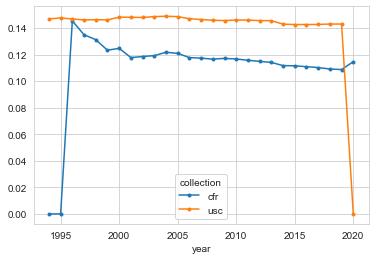

In [8]:
plot_df = df_year\
.reset_index()\
.pivot(index='year', columns='collection', values='ratio')\
.fillna(0)
plot_df.plot(marker='.')
plt.savefig('../graphics/reference_extraction_quality_estimation_us_ratio.pdf')

In [9]:
plot_cols = ['references', 'other_sections', 'other_symbols', 'other_parts']

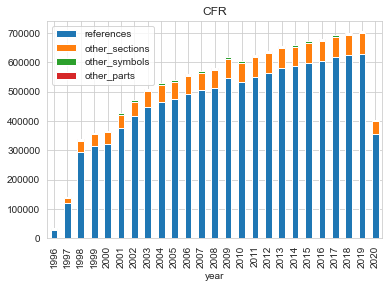

In [10]:
df_year.loc['cfr'].plot(kind='bar', y=plot_cols, stacked=True, title='CFR')
plt.savefig('../graphics/reference_extraction_quality_estimation_us_cfr.pdf')

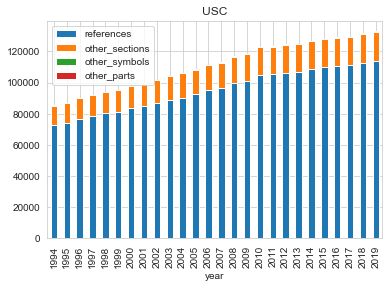

In [11]:
df_year.loc['usc'].plot(kind='bar', y=plot_cols, stacked=True, title='USC')
plt.savefig('../graphics/reference_extraction_quality_estimation_us_usc.pdf')